In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
import warnings

Rows_to_show = 100
C2 = 'B_C2H6'
C3 = 'B_C3H8'
C4i = 'B_iC4H10'
C4 = 'B_nC4H10'
R = "B_rate"
A_R = "A_rate"
A_C = 'A_CH4'
A_C2 = "A_C2H6"
A_C3 = 'A_C3H8'
A_C4i = 'A_iC4H10'
A_C4 = 'A_nC4H10'
A_C5i = 'A_iC5H12'
A_C5 = 'A_nC5H12'
A_C6 = 'A_C6H14'
C1_2 = 'CH4 + C2H6'
C5_plus = 'C5+'
T = 'timestamp'

df_y = pd.read_csv('train_targets.csv')
df_X = pd.read_csv('train_features.csv')

In [14]:
df_y = df_y.dropna()

In [10]:
df_X = df_X.dropna()

In [18]:
X = df_X.merge(df_y, how = 'left', on = 'timestamp')

In [22]:
X = X.dropna() # соединеные данные

# как выглядят целевые показатели

Text(0.5, 1.0, 'графики для столбца')

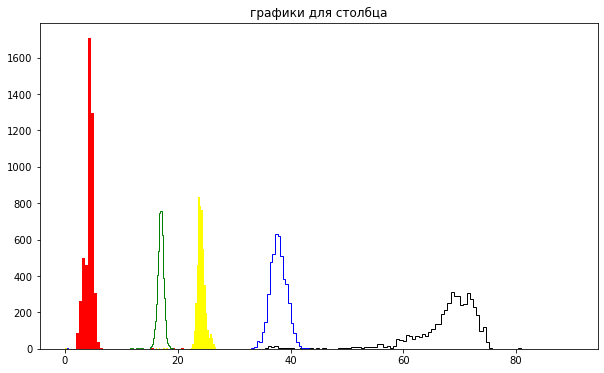

In [33]:
fig, axs = plt.subplots (figsize = (10,6))
axs.hist(X['B_rate'], bins = 100, histtype = 'step', color = 'black') # черная рамка
axs.hist(X['B_C2H6'], bins = 100, color = 'red')
axs.hist(X['B_C3H8'], bins = 100, histtype = 'step', color = 'blue')
axs.hist(X['B_iC4H10'], bins = 100, histtype = 'step', color = 'green')
axs.hist(X['B_nC4H10'], bins = 100, color = 'yellow')
axs.set_title('графики для столбца')





In [ ]:
# визуально можно сказать, что целевые пармтеры расперделны нормально
# только в параметре "расход" мы видим "левый хвост" - низкая загрузка трубы

# проверка целевых фитчей на нормальность

In [35]:
list_p_value = []

from scipy import stats
for i in ['B_rate', 'B_C2H6', 'B_C3H8', 'B_iC4H10', 'B_nC4H10']:
    k2, p = stats.normaltest(X[i])
    list_p_value.append(p)
    continue

print(list_p_value)
    


[0.0, 0.0, 0.0, 0.0, 0.0]


In [42]:
list_X = list(X) 
list_X.remove('timestamp')

In [49]:
list_p_value_general = []

from scipy import stats
for i in list_X:
    k2, p = stats.normaltest(X[i])
    list_p_value_general.append(p)
    continue
p_value = pd.DataFrame(list_X, list_p_value_general)

In [50]:
p_value

,0
0.000000e+00,A_rate
6.672922e-79,A_CH4
3.976249e-187,A_C2H6
0.000000e+00,A_C3H8
5.718842e-277,A_iC4H10
0.000000e+00,A_nC4H10
0.000000e+00,A_iC5H12
0.000000e+00,A_nC5H12
0.000000e+00,A_C6H14
0.000000e+00,B_rate


In [53]:
# scipy не оставил шансов на НЕ нормальное распредление
# наверное данные готовили

# диаграмма рассеивания - несколько график для ключевых значений

In [23]:
list_of_columns = list(X)


In [25]:
list_of_columns.remove('timestamp')

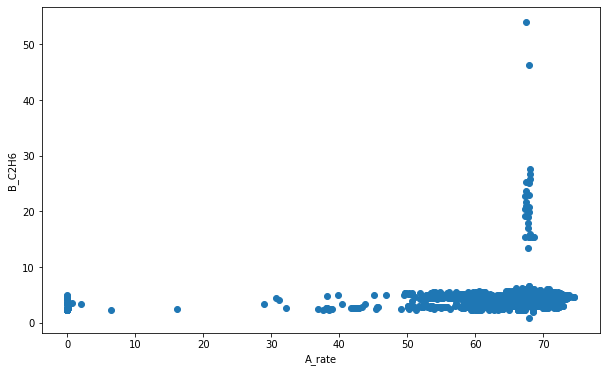

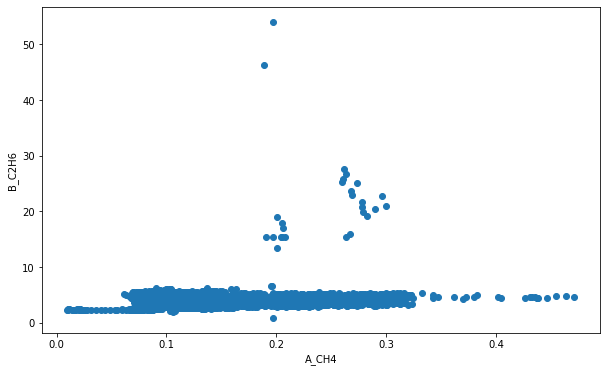

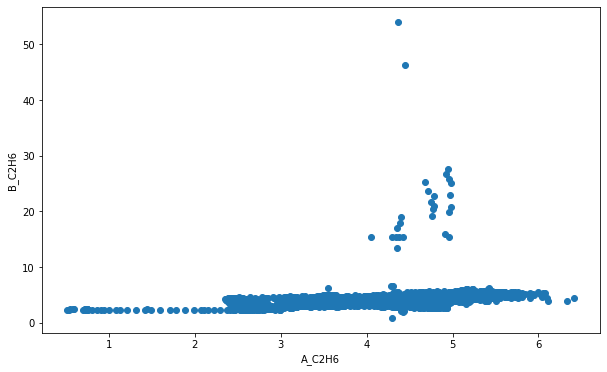

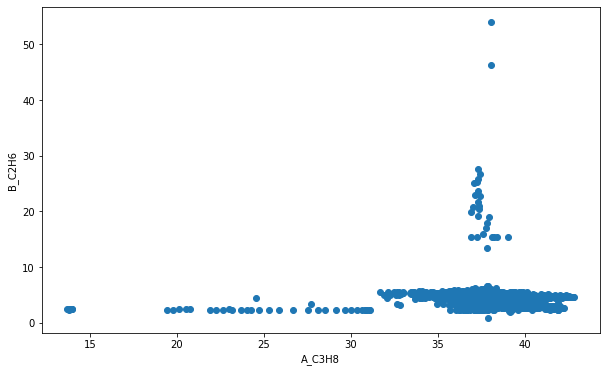

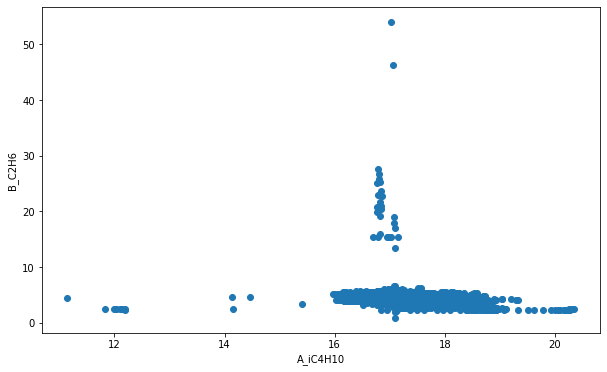

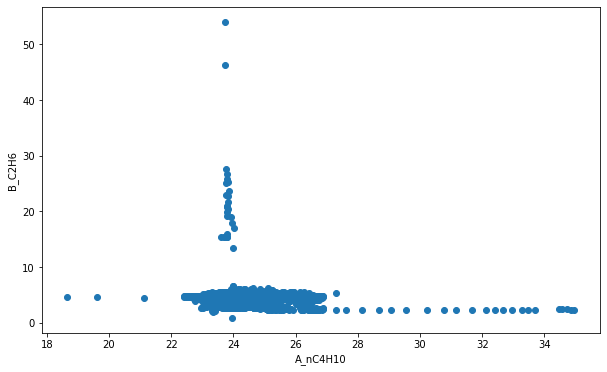

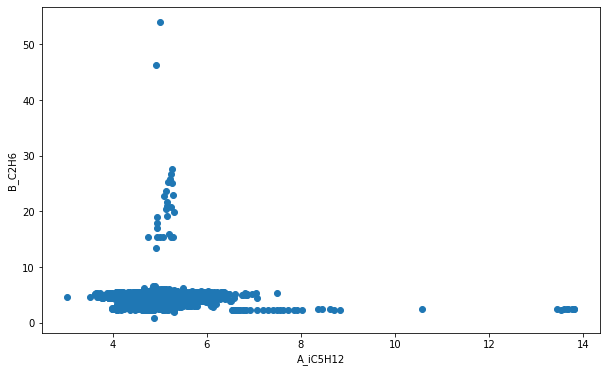

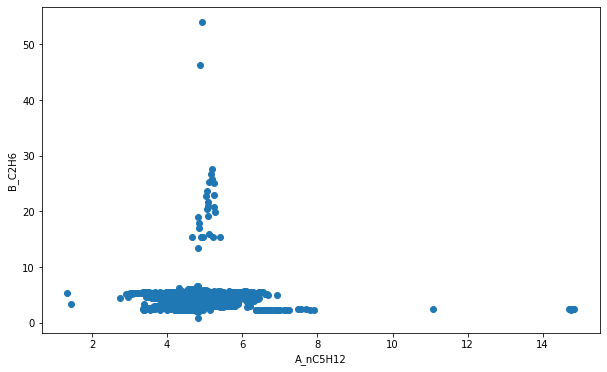

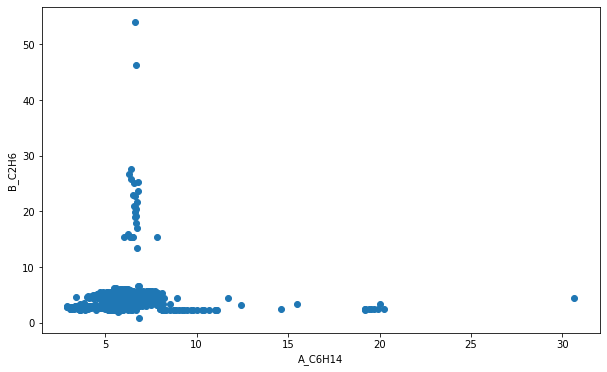

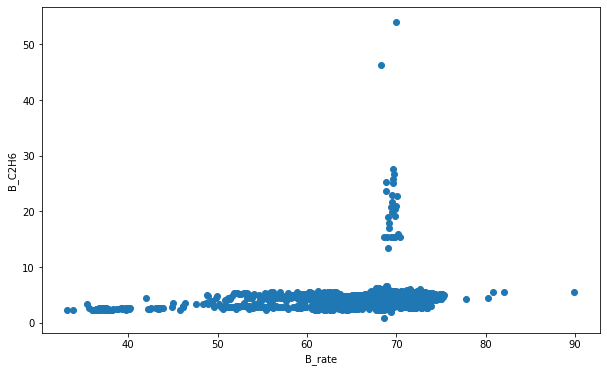

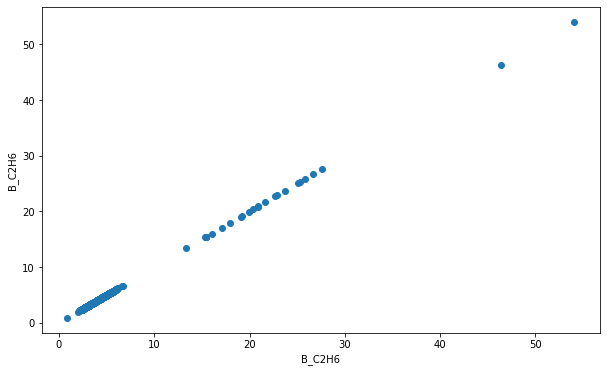

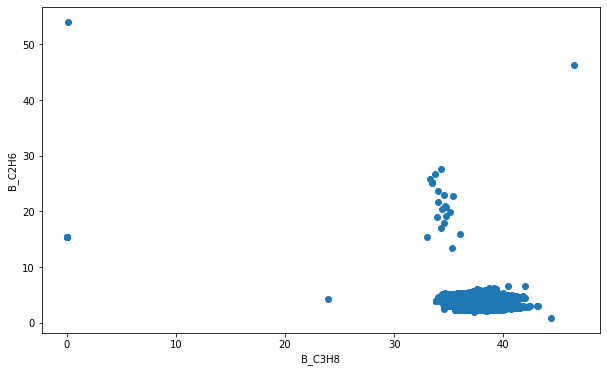

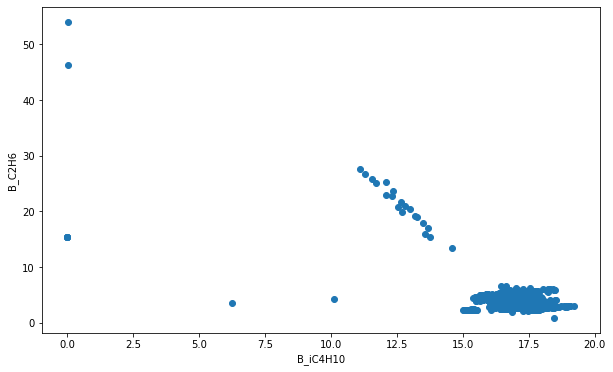

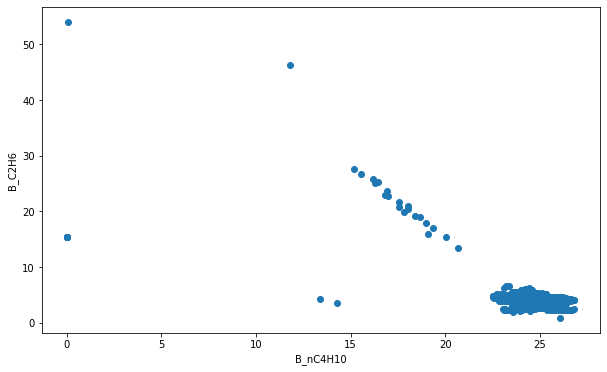

In [28]:
for i in list_of_columns: 
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x = X[i], y = X['B_C2H6'])
    plt.xlabel(i)
    plt.ylabel("B_C2H6")
    plt.show()
    continue

тут такие явные выбросы при B_C2H6 больше 10 я думаю их можно будет удалить для создания красивой регерссии

In [26]:
list_of_columns

['A_rate',
 'A_CH4',
 'A_C2H6',
 'A_C3H8',
 'A_iC4H10',
 'A_nC4H10',
 'A_iC5H12',
 'A_nC5H12',
 'A_C6H14',
 'B_rate',
 'B_C2H6',
 'B_C3H8',
 'B_iC4H10',
 'B_nC4H10']

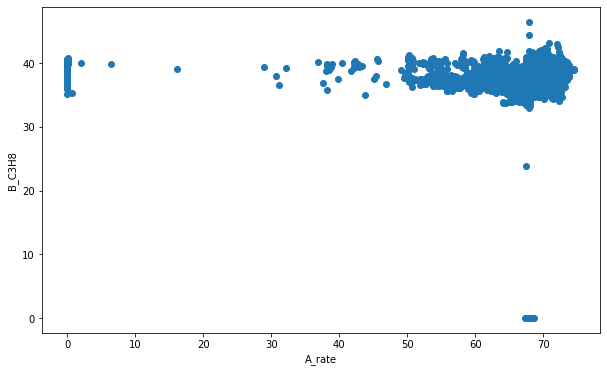

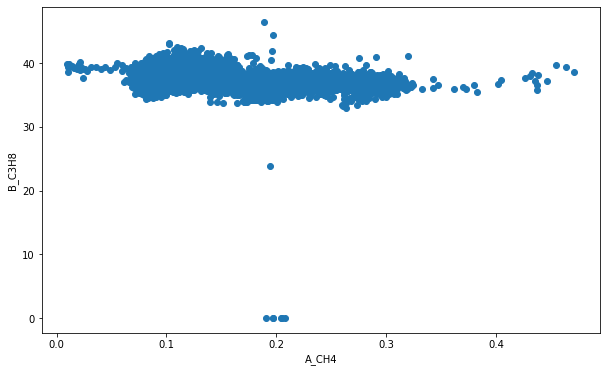

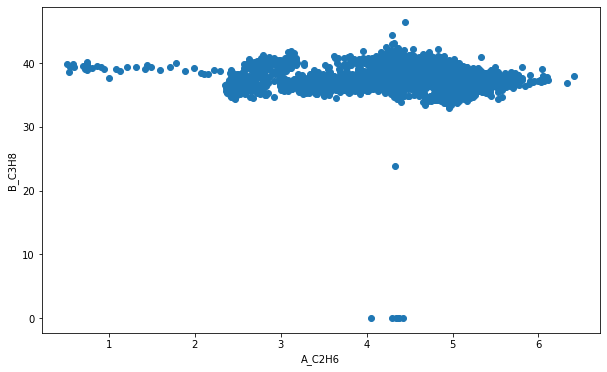

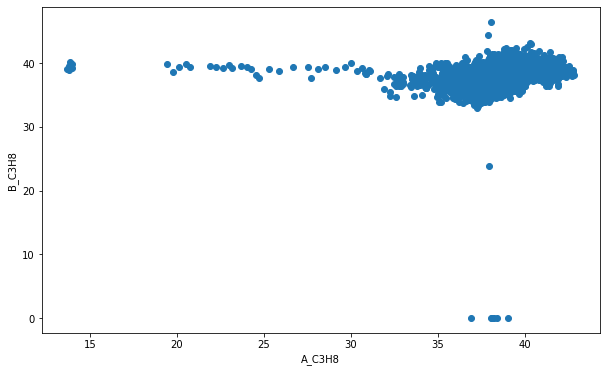

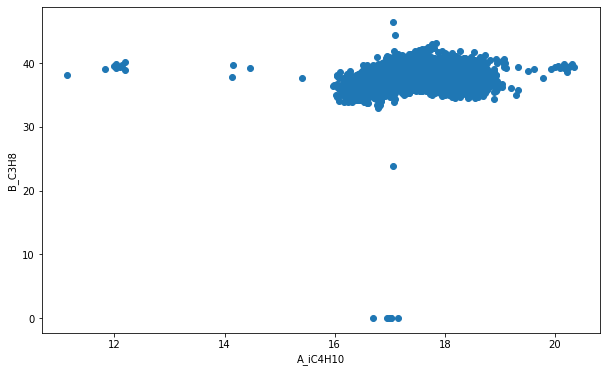

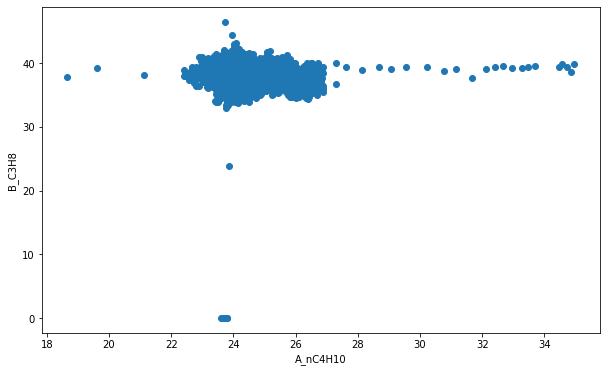

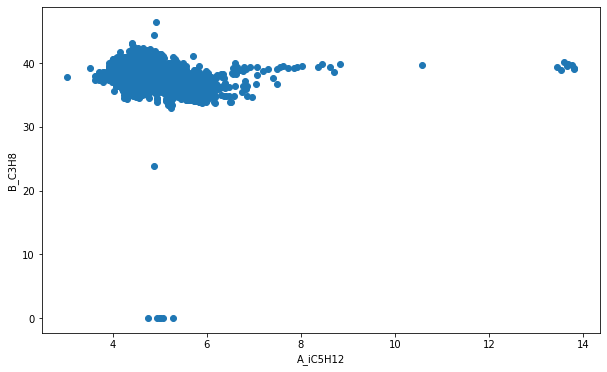

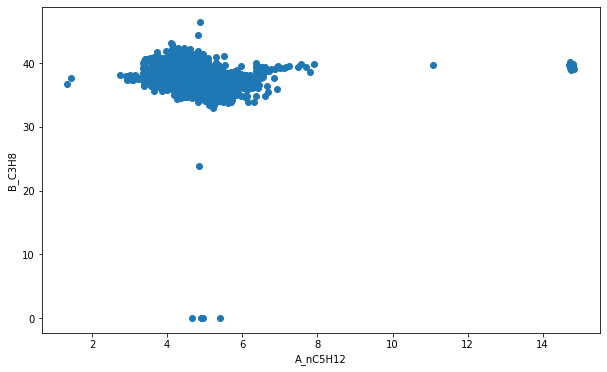

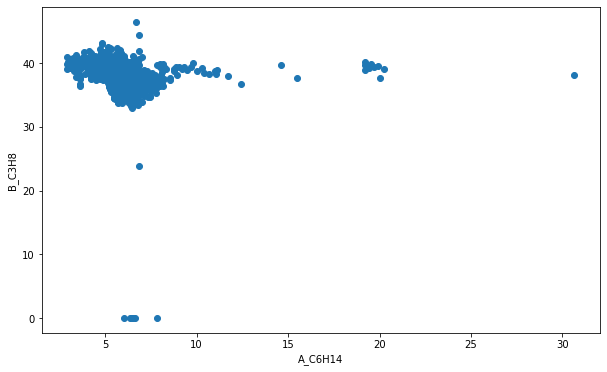

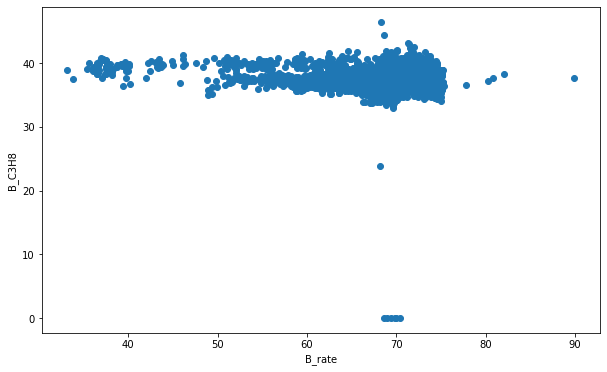

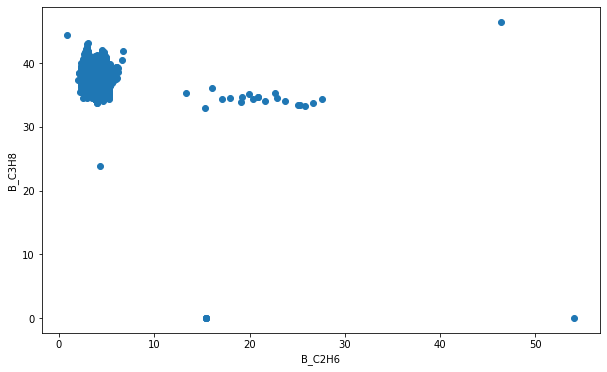

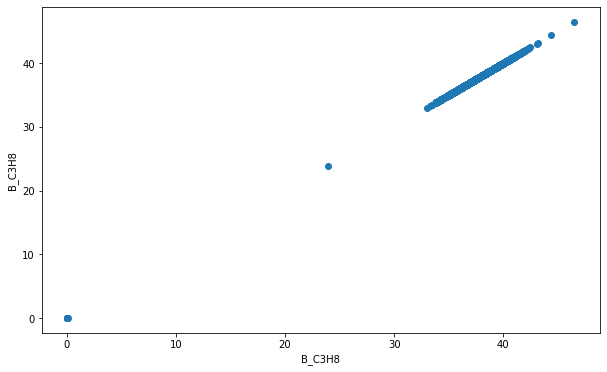

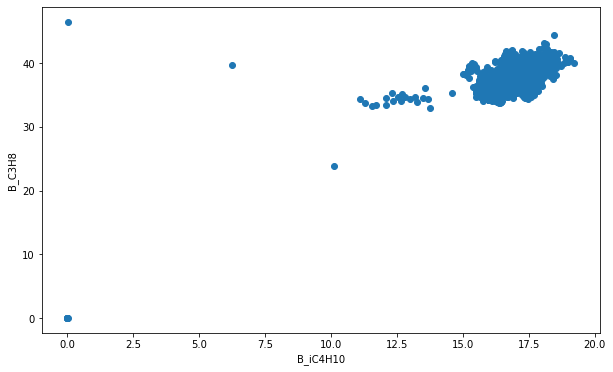

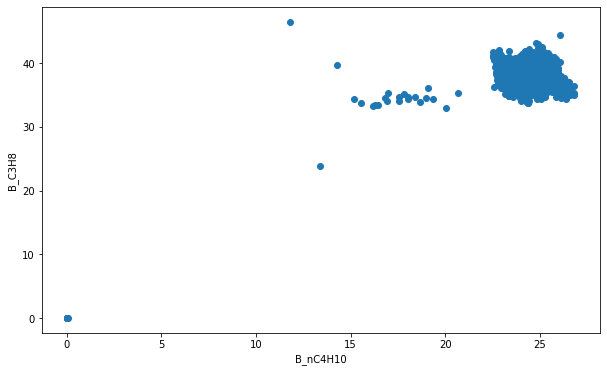

In [54]:
for i in list_of_columns: 
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x = X[i], y = X['B_C3H8'])
    plt.xlabel(i)
    plt.ylabel("B_C3H8")
    plt.show()
    continue

я думаю концентарция пропарна С3Н8 ниже 30% целесообразно считать выбросами

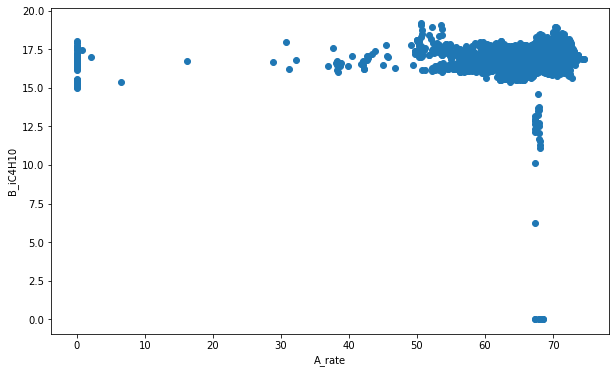

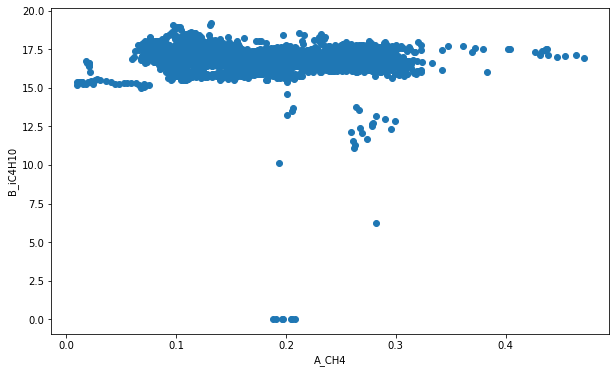

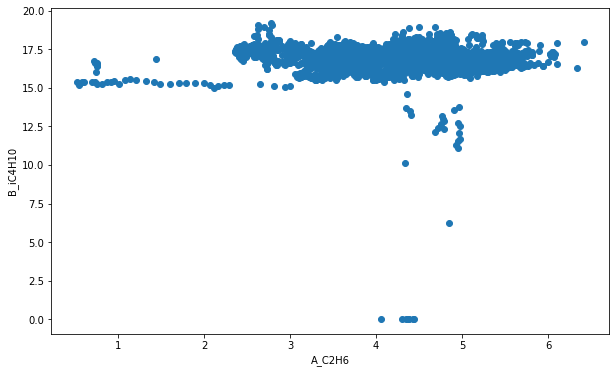

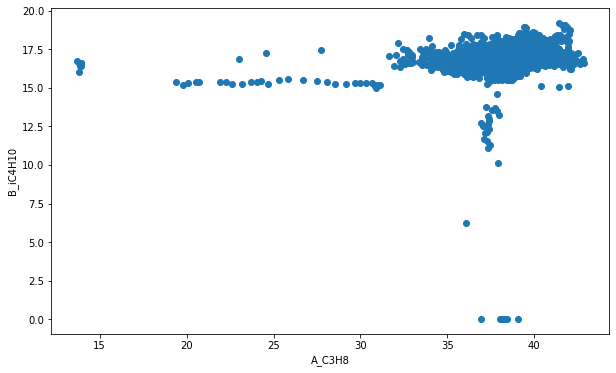

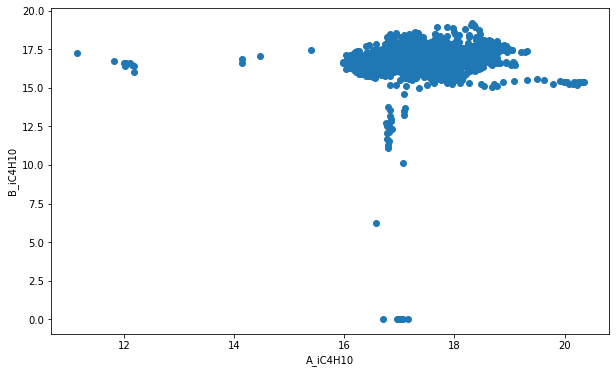

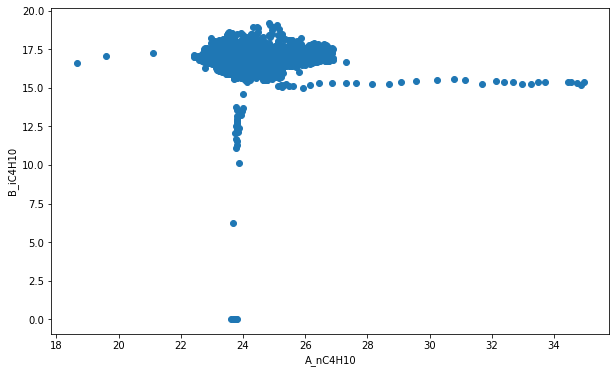

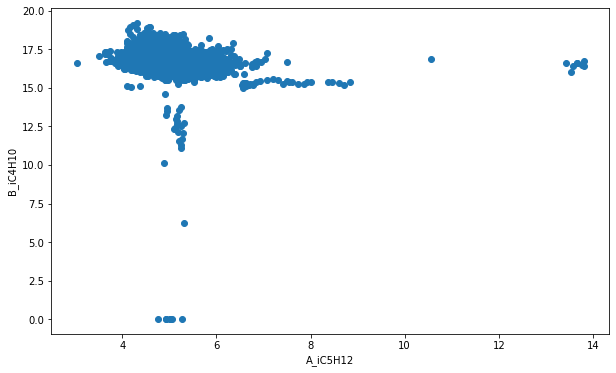

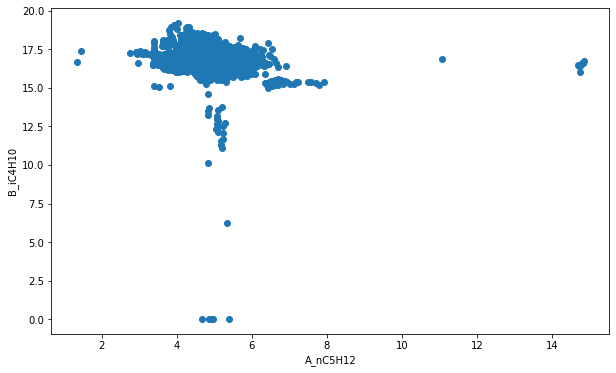

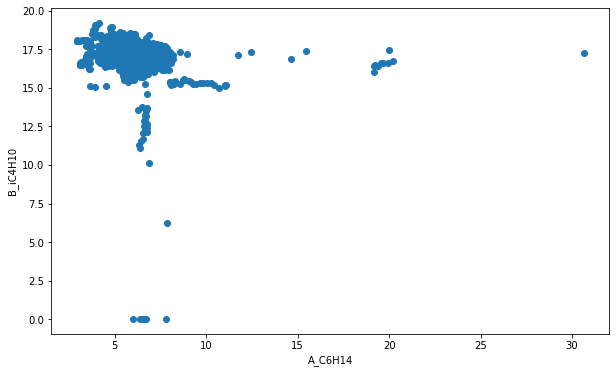

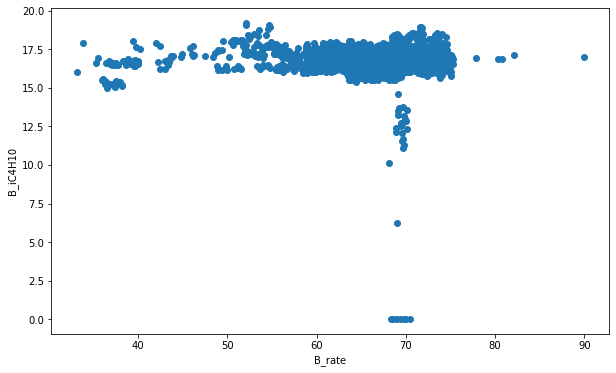

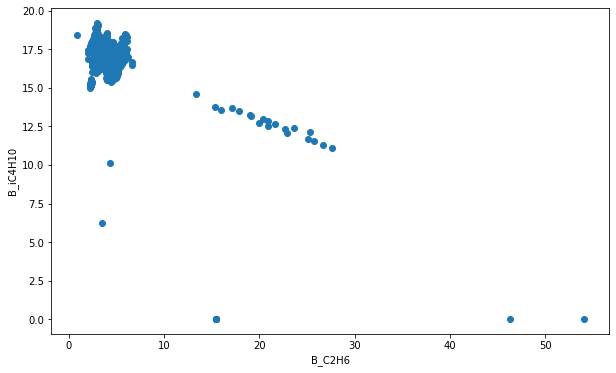

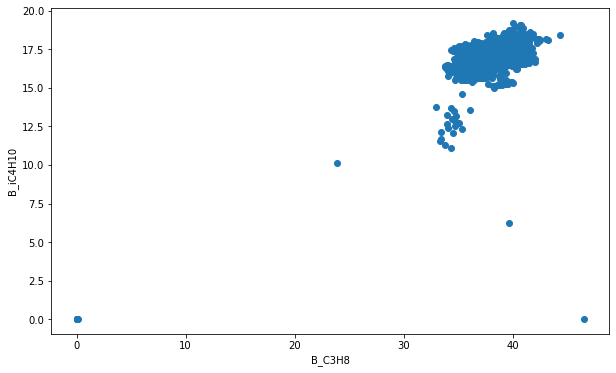

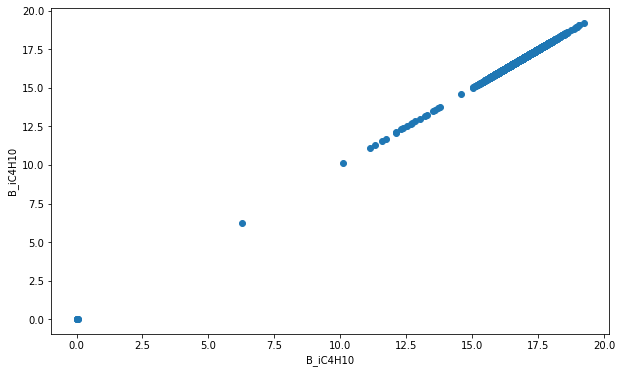

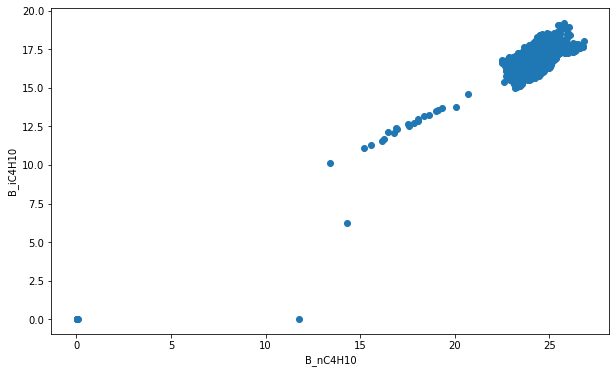

In [55]:
for i in list_of_columns: 
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x = X[i], y = X['B_iC4H10'])
    plt.xlabel(i)
    plt.ylabel("B_iC4H10")
    plt.show()
    continue

концентрацию изо-бутана ниже 15% принимаем за выбросы

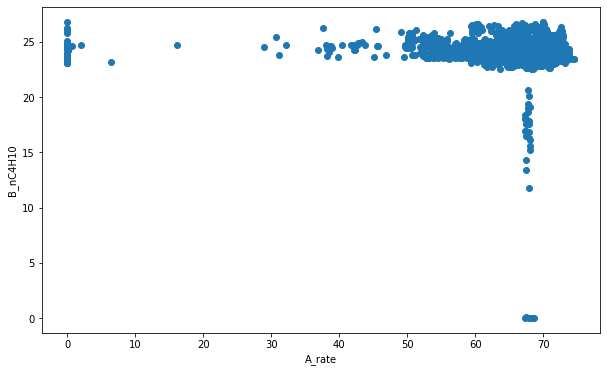

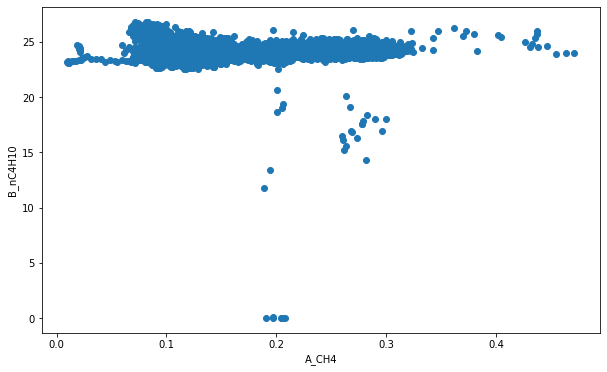

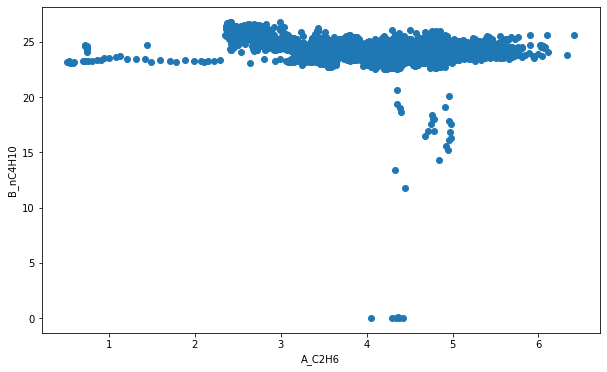

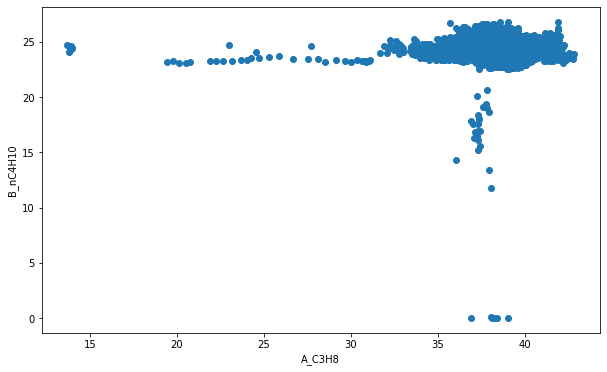

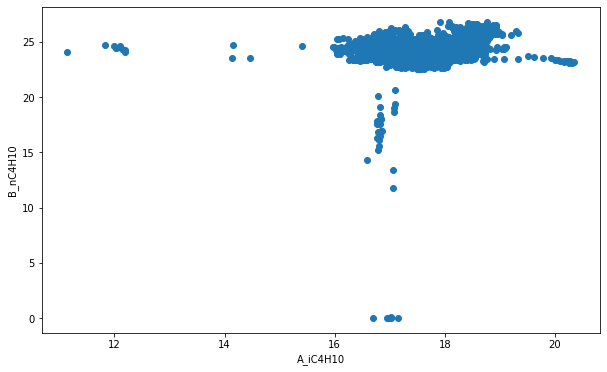

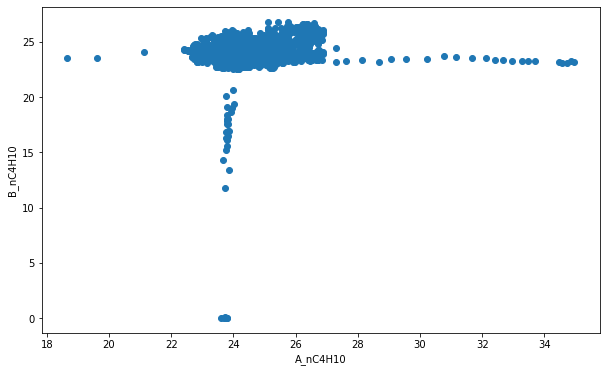

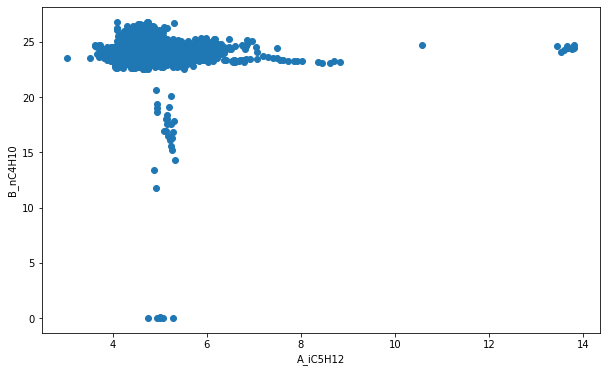

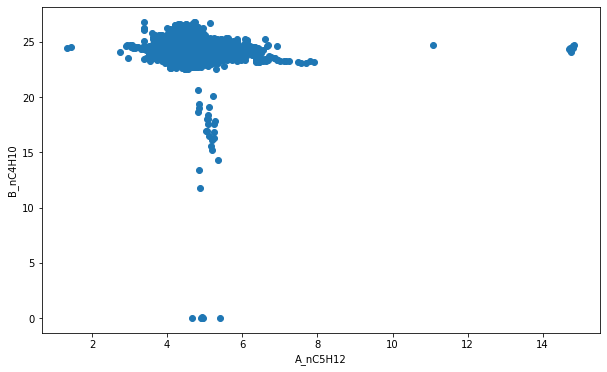

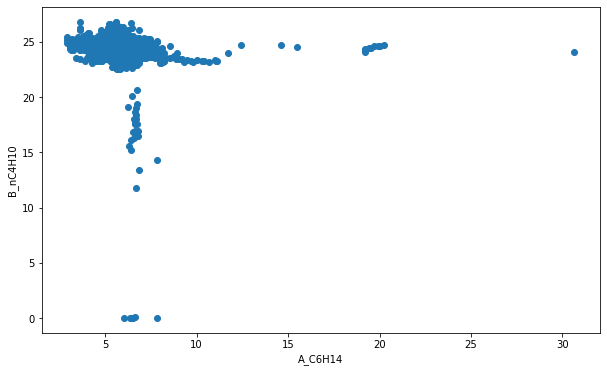

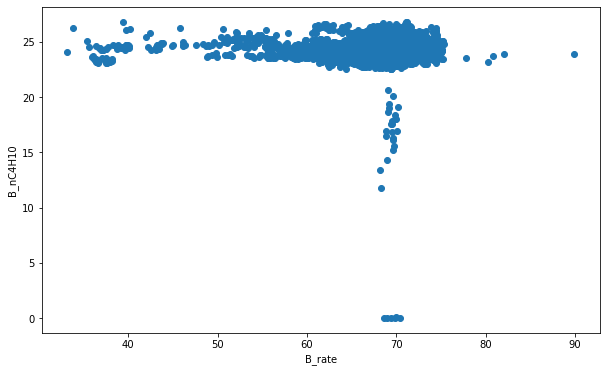

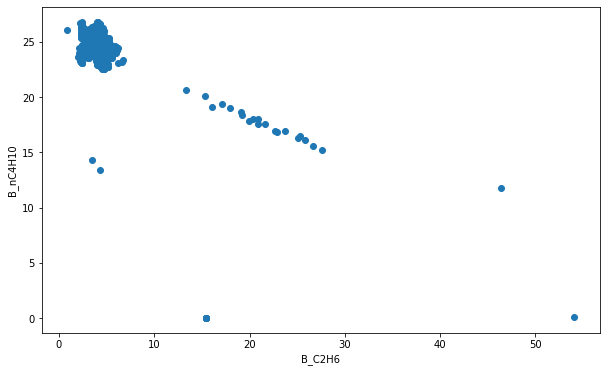

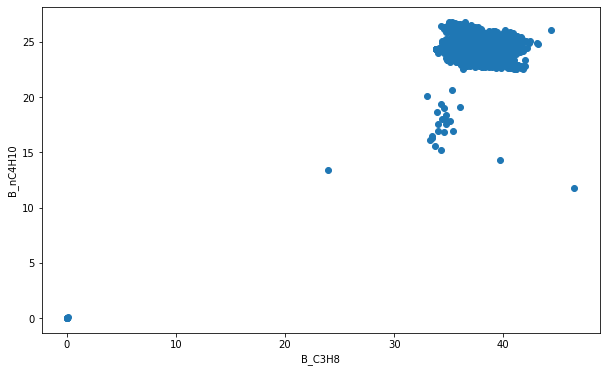

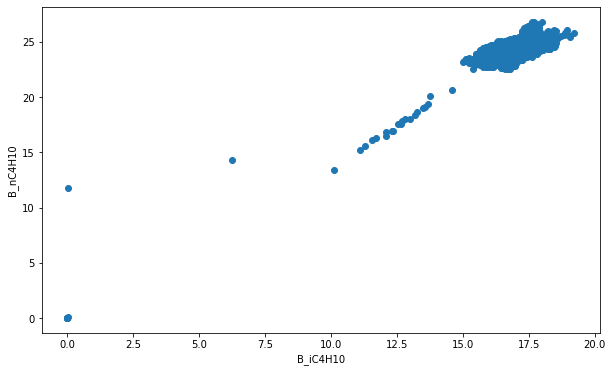

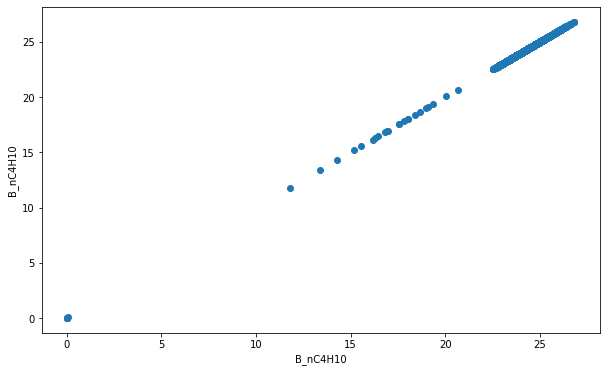

In [57]:
for i in list_of_columns: 
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x = X[i], y = X['B_nC4H10'])
    plt.xlabel(i)
    plt.ylabel("B_nC4H10")
    plt.show()
    continue

Концентрацию нормального бутана ниже 22% принимаем за выбросы

# Выбросы

    Концентарция этана _______больше 10% целесообразно считать выбросами
    Концентарция пропарна ____ниже 30% целесообразно считать выбросами
    Концентрацию изо-бутана __ниже 15% принимаем за выбросы
    Концентрацию норм-бутана__ниже 22% принимаем за выбросы

#### Clearning

In [84]:
X_after_clearning = X.copy()

In [85]:
X_after_clearning = X[X['B_C2H6'] < 10]

In [86]:
X_after_clearning = X_after_clearning[X_after_clearning['B_C3H8'] > 30]

In [87]:
X_after_clearning = X_after_clearning[X_after_clearning['B_iC4H10'] > 15]

In [88]:
X_after_clearning = X_after_clearning[X_after_clearning['B_nC4H10'] > 22]

# КОРРЕЛЯЦИИ

In [90]:
correlation = X_after_clearning.corr()

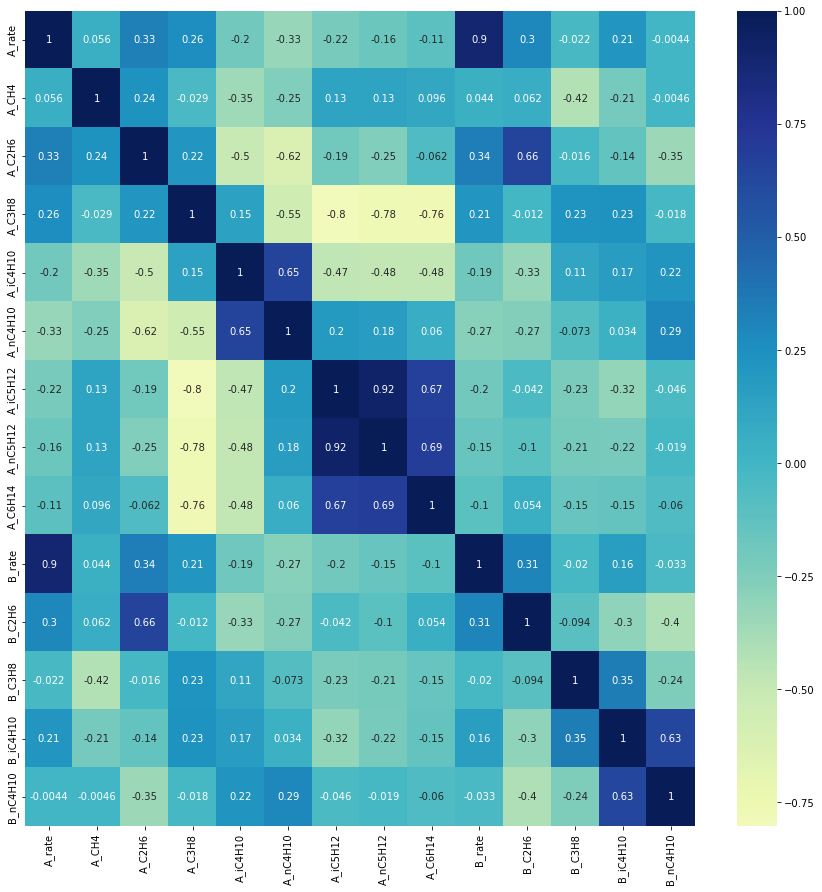

In [91]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(correlation, center=0, annot=True, cmap="YlGnBu")

In [92]:
X_after_clearning.to_csv('data_for_regression.csv')